In [1]:
import pandas as pd
import numpy as np

import pymc as pm

In [2]:
click_df = pd.read_csv("Data_ver2.csv")

click_df.head(100)

click_df['avgTime'].dropna(inplace=True)

In [3]:
# Create the features and response
X = click_df.loc[:, ['tab_nopic_clicks', 'list_nopic_clicks','paragraph_nopic_clicks','tab_pic_clicks','list_pic_clicks','paragraph_pic_clicks']]
y = click_df.loc[:, 'avgTime']

In [4]:
with pm.Model() as linear_model2:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sigma = 10)

    # Slope
    slopetab_nopic_clicks = pm.Normal('slopetab_nopic_clicks', mu = 0, sigma = 10)
    slopelist_nopic_clicks = pm.Normal('slopelist_nopic_clicks', mu = 0, sigma = 10)
    slopeparagraph_nopic_clicks = pm.Normal('slopeparagraph_nopic_clicks', mu = 0, sigma = 10)
    slopetab_pic_clicks = pm.Normal('slopetab_pic_clicks', mu = 0, sigma = 10)
    slopelist_pic_clicks = pm.Normal('slopelist_pic_clicks', mu = 0, sigma = 10)
    slopeparagraph_pic_clicks = pm.Normal('slopeparagraph_pic_clicks', mu = 0, sigma = 10)

    # Standard deviation
    sigma = pm.HalfNormal('sigma', sigma = 10)

    # Estimate of mean
    mean = intercept + slopetab_nopic_clicks * X.loc[:, 'tab_nopic_clicks'] + slopelist_nopic_clicks * X.loc[:, 'list_nopic_clicks'] + slopeparagraph_nopic_clicks * X.loc[:, 'paragraph_nopic_clicks'] + slopetab_pic_clicks * X.loc[:, 'tab_pic_clicks'] + slopelist_pic_clicks * X.loc[:, 'list_pic_clicks'] + slopeparagraph_pic_clicks * X.loc[:, 'paragraph_pic_clicks']

    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sigma = sigma, observed = y.values)

    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(draws=1000, step=step)

C:\Users\Francis\anaconda3\envs\pymc_env\Lib\site-packages\pymc\model\core.py:1317: ImputationWarning: Data in Y_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, slopetab_nopic_clicks, slopelist_nopic_clicks, slopeparagraph_nopic_clicks, slopetab_pic_clicks, slopelist_pic_clicks, slopeparagraph_pic_clicks, sigma, Y_obs_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


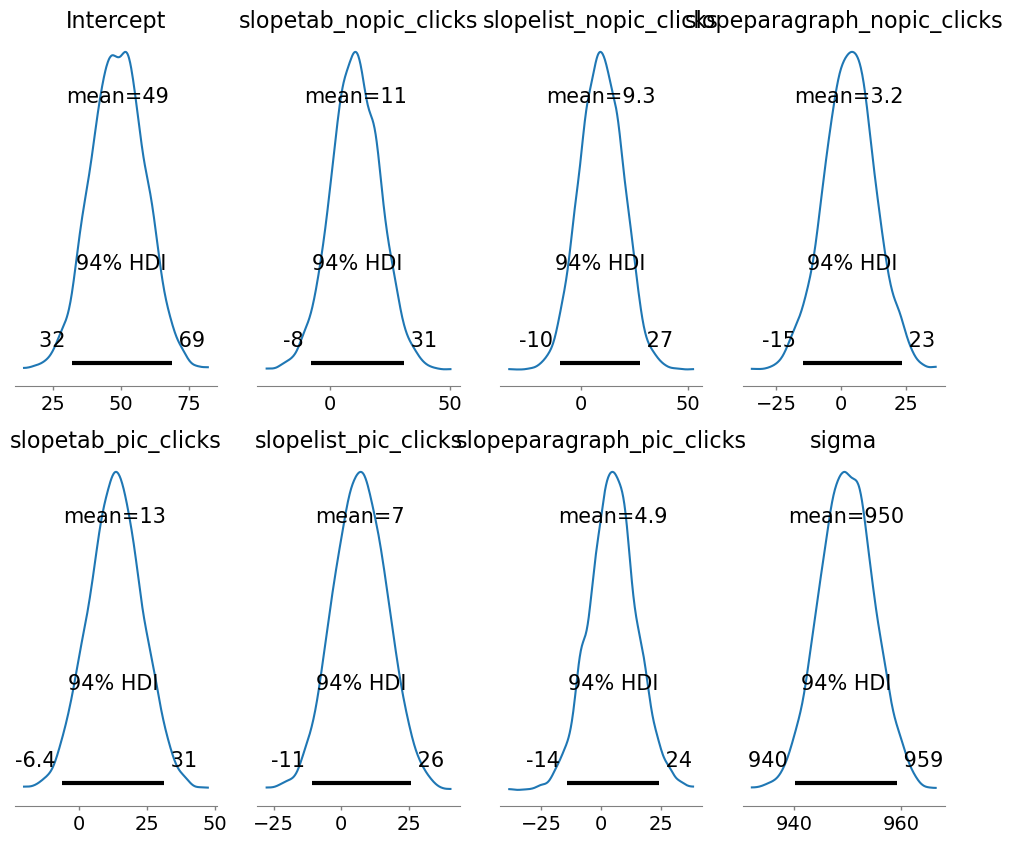

In [5]:
variables_to_plot = ['Intercept', 'slopetab_nopic_clicks', 'slopelist_nopic_clicks',
                     'slopeparagraph_nopic_clicks', 'slopetab_pic_clicks',
                     'slopelist_pic_clicks', 'slopeparagraph_pic_clicks', 'sigma']

pm.plot_posterior(linear_trace, var_names=variables_to_plot, figsize=(12, 10))
plot_data = pm.summary(linear_trace, var_names=variables_to_plot)

In [6]:
variables = ['slopetab_nopic_clicks', 'slopelist_nopic_clicks', 'slopeparagraph_nopic_clicks',
             'slopetab_pic_clicks', 'slopelist_pic_clicks', 'slopeparagraph_pic_clicks']

In [7]:
# y = 49 + + xi * 11 + xi * 9.2 + xi * 3.1 + xi * 13 + xi * 6.9 + xi * 4.8

In [8]:
import itertools

In [9]:
digits = [0, 1]
coefficients = plot_data.loc[variables, "mean"].to_list()
combinations = list(itertools.product(digits, repeat=6))

In [10]:
combinations

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 0),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 0),
 (0, 1, 0, 1, 1, 1),
 (0, 1, 1, 0, 0, 0),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1, 1),
 (0, 1, 1, 1, 0, 0),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 0),
 (0, 1, 1, 1, 1, 1),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 0),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 0),
 (1, 0, 0, 1, 1, 1),
 (1, 0, 1, 0, 0, 0),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1, 1),
 (1, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 0, 1),
 (1, 0, 1, 1, 1, 0),
 (1, 0, 1, 1,

In [11]:
def calculate_y(combination):
    y = 49
    for digit, coeff in zip(combination, coefficients):
        y += int(digit) * coeff
    return y

In [12]:
y_values = [calculate_y(combination) for combination in combinations]

In [13]:
y_values

[49.0,
 53.928,
 55.961,
 60.888999999999996,
 62.168,
 67.096,
 69.129,
 74.057,
 52.179,
 57.107,
 59.14,
 64.068,
 65.34700000000001,
 70.275,
 72.308,
 77.236,
 58.333,
 63.260999999999996,
 65.294,
 70.222,
 71.501,
 76.429,
 78.462,
 83.39,
 61.512,
 66.44,
 68.473,
 73.401,
 74.68,
 79.608,
 81.641,
 86.569,
 59.775,
 64.703,
 66.736,
 71.664,
 72.943,
 77.871,
 79.904,
 84.832,
 62.954,
 67.882,
 69.915,
 74.843,
 76.122,
 81.05,
 83.083,
 88.011,
 69.108,
 74.036,
 76.069,
 80.997,
 82.27600000000001,
 87.20400000000001,
 89.23700000000001,
 94.165,
 72.287,
 77.215,
 79.248,
 84.176,
 85.45500000000001,
 90.38300000000001,
 92.41600000000001,
 97.34400000000001]

In [14]:
values_df = pd.DataFrame(combinations, columns=variables)
values_df['Concatenated_Variables'] = values_df.apply(lambda row: ''.join(row.astype(str)), axis=1)
values_df['y_values'] = y_values

In [15]:
values_df

,slopetab_nopic_clicks,slopelist_nopic_clicks,slopeparagraph_nopic_clicks,slopetab_pic_clicks,slopelist_pic_clicks,slopeparagraph_pic_clicks,Concatenated_Variables,y_values
0,0,0,0,0,0,0,000000,49.000
1,0,0,0,0,0,1,000001,53.928
2,0,0,0,0,1,0,000010,55.961
3,0,0,0,0,1,1,000011,60.889
4,0,0,0,1,0,0,000100,62.168
...,...,...,...,...,...,...,...,...
59,1,1,1,0,1,1,111011,84.176
60,1,1,1,1,0,0,111100,85.455
61,1,1,1,1,0,1,111101,90.383
62,1,1,1,1,1,0,111110,92.416


In [16]:
import matplotlib.pyplot as plt

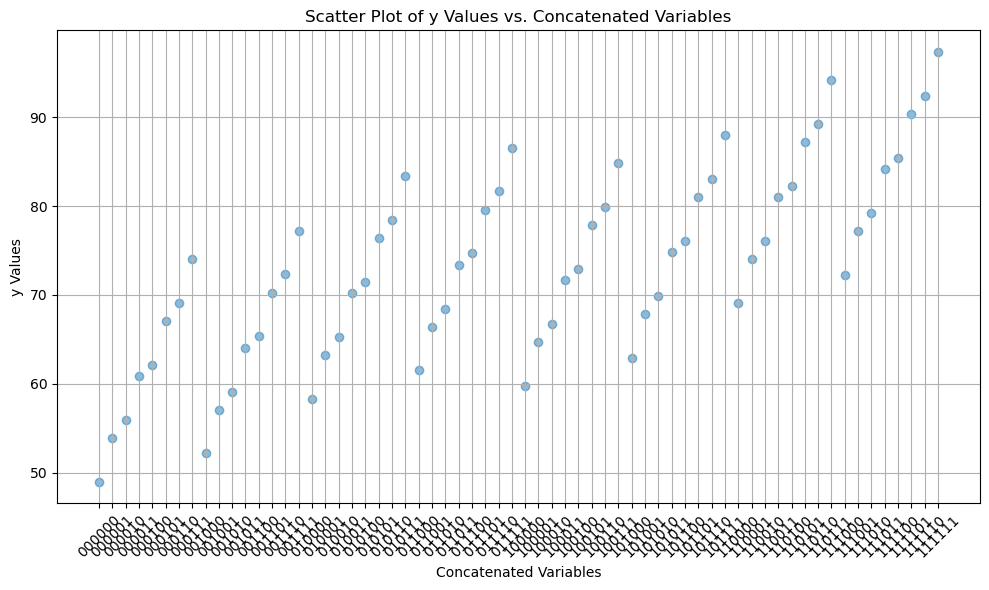

In [17]:
# Scatter plot of y values vs. concatenated variables
plt.figure(figsize=(10, 6))
plt.scatter(values_df['Concatenated_Variables'], values_df['y_values'], alpha=0.5)
plt.xlabel('Concatenated Variables')
plt.ylabel('y Values')
plt.title('Scatter Plot of y Values vs. Concatenated Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


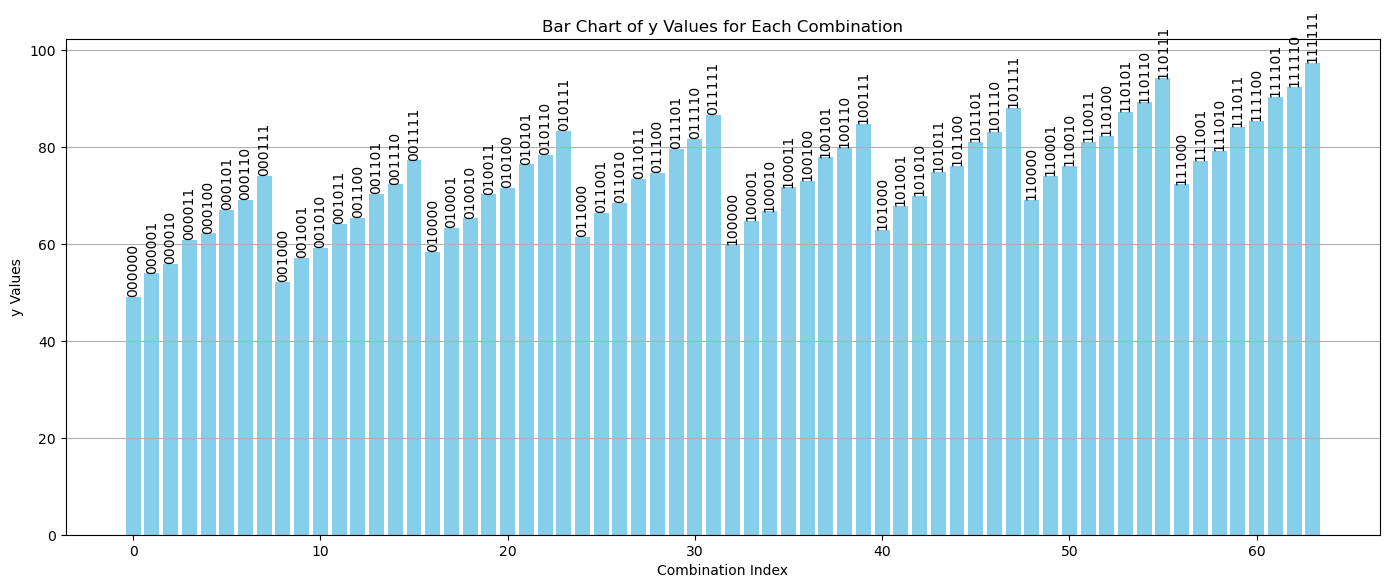

In [18]:
# Sort the DataFrame by concatenated variables
sorted_df = values_df.sort_values(by='Concatenated_Variables')

# Bar chart of y values for each combination with annotations
plt.figure(figsize=(14, 6))
bars = plt.bar(sorted_df.index, sorted_df['y_values'], color='skyblue')

# Annotate each bar with its concatenated variables
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             sorted_df['Concatenated_Variables'].iloc[i], 
             ha='center', va='bottom', rotation=90)

plt.xlabel('Combination Index')
plt.ylabel('y Values')
plt.title('Bar Chart of y Values for Each Combination')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
plot_data # data of the posterior distribution

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,48.775,9.941,31.801,68.599,0.103,0.075,9366.0,3012.0,1.0
slopetab_nopic_clicks,10.775,10.241,-7.968,30.657,0.107,0.128,9096.0,2372.0,1.0
slopelist_nopic_clicks,9.333,10.173,-9.990,27.272,0.099,0.132,10468.0,2580.0,1.0
slopeparagraph_nopic_clicks,3.179,9.946,-14.797,23.399,0.104,0.174,9117.0,2678.0,1.0
slopetab_pic_clicks,13.168,10.035,-6.430,31.168,0.106,0.117,9062.0,2342.0,1.0
slopelist_pic_clicks,6.961,9.885,-10.925,25.939,0.098,0.133,10186.0,2882.0,1.0
slopeparagraph_pic_clicks,4.928,10.083,-14.170,24.188,0.101,0.167,10045.0,2853.0,1.0
sigma,949.776,5.038,940.189,959.186,0.052,0.037,9453.0,2921.0,1.0


In [20]:
plot_data.to_csv("time_findings.csv") # turning it to csv for clicks / time processing